In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sklearn
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    explained_variance_score,
    mean_absolute_percentage_error,
    mean_absolute_error,
    mean_squared_error,
    mean_squared_log_error,
    r2_score
)
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from datetime import datetime
import warnings
warnings.filterwarnings('ignore') 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
df = pd.read_csv('./data/F1_Project.csv')
df.head()

Track  Track_ID  End_Grid  Start_Grid  Driver_ID           Driver  \
0       Bahrain         1        16          13         24      Guanyu Zhou   
1  Saudi Arabia         2        13          11         24      Guanyu Zhou   
2  Saudi Arabia         2        18          14         77  Valtteri Bottas   
3     Australia         3        11          19         77  Valtteri Bottas   
4    Azerbaijan         5        18          13         77  Valtteri Bottas   

                 Team  Team_ID  Points  Set_Fastest_Lap  Year_ID  \
0  Alfa Romeo Ferrari       11       0             True     2023   
1  Alfa Romeo Ferrari       11       0            False     2023   
2  Alfa Romeo Ferrari       11       0            False     2023   
3  Alfa Romeo Ferrari       11       0            False     2023   
4  Alfa Romeo Ferrari       11       0            False     2023   

   Position_Difference  Track Length  Podium  Track Laps  Height  Weight  \
0                   -3           5.4   False          57    1.75      63   
1                   -2           6.1   False          50    1.75      63   
2                   -4           6.1   False          50    1.73      69   
3                    8           5.3   False          58    1.73      69   
4                   -5           6.0   False          51    1.73      69   

  Track_Category  
0            Dry  
1            Dry  
2            Dry  
3            Dry  
4            Dry

In [3]:
df.shape

(519, 18)

In [4]:
df.isnull().sum()

Track                  0
Track_ID               0
End_Grid               0
Start_Grid             0
Driver_ID              0
Driver                 0
Team                   0
Team_ID                0
Points                 0
Set_Fastest_Lap        0
Year_ID                0
Position_Difference    0
Track Length           0
Podium                 0
Track Laps             0
Height                 0
Weight                 0
Track_Category         0
dtype: int64

In [5]:
(df.isnull().sum())/len(df)

Track                  0.0
Track_ID               0.0
End_Grid               0.0
Start_Grid             0.0
Driver_ID              0.0
Driver                 0.0
Team                   0.0
Team_ID                0.0
Points                 0.0
Set_Fastest_Lap        0.0
Year_ID                0.0
Position_Difference    0.0
Track Length           0.0
Podium                 0.0
Track Laps             0.0
Height                 0.0
Weight                 0.0
Track_Category         0.0
dtype: float64

In [6]:
def fill_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            most_common_value = df[column].mode()[0]
            df[column].fillna(most_common_value, inplace=True)
        else:
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)

    return df

In [7]:
fill_missing_values(df)

Track  Track_ID  End_Grid  Start_Grid  Driver_ID  \
0          Bahrain         1        16          13         24   
1     Saudi Arabia         2        13          11         24   
2     Saudi Arabia         2        18          14         77   
3        Australia         3        11          19         77   
4       Azerbaijan         5        18          13         77   
..             ...       ...       ...         ...        ...   
514    Netherlands        15         8           4         23   
515          Italy        13         7           6         23   
516  United States        18         9          15         23   
517  United States        18        10          16          2   
518         Mexico        19         9          14         23   

              Driver                Team  Team_ID  Points  Set_Fastest_Lap  \
0        Guanyu Zhou  Alfa Romeo Ferrari       11       0             True   
1        Guanyu Zhou  Alfa Romeo Ferrari       11       0            False   
2    Valtteri Bottas  Alfa Romeo Ferrari       11       0            False   
3    Valtteri Bottas  Alfa Romeo Ferrari       11       0            False   
4    Valtteri Bottas  Alfa Romeo Ferrari       11       0            False   
..               ...                 ...      ...     ...              ...   
514  Alexander Albon   Williams Mercedes       10       4            False   
515  Alexander Albon   Williams Mercedes       10       6            False   
516  Alexander Albon   Williams Mercedes       10       2            False   
517   Logan Sargeant   Williams Mercedes       10       1            False   
518  Alexander Albon   Williams Mercedes       10       2            False   

     Year_ID  Position_Difference  Track Length  Podium  Track Laps  Height  \
0       2023                   -3           5.4   False          57    1.75   
1       2023                   -2           6.1   False          50    1.75   
2       2023                   -4           6.1   False          50    1.73   
3       2023                    8           5.3   False          58    1.73   
4       2023                   -5           6.0   False          51    1.73   
..       ...                  ...           ...     ...         ...     ...   
514     2023                   -4           4.2   False          44    1.86   
515     2023                   -1           5.7   False          53    1.86   
516     2023                    6           3.4   False          56    1.86   
517     2023                    6           3.4   False          56    1.81   
518     2023                    5           4.3   False          71    1.86   

     Weight Track_Category  
0        63            Dry  
1        63            Dry  
2        69            Dry  
3        69            Dry  
4        69            Dry  
..      ...            ...  
514      74            Wet  
515      74            Dry  
516      74            Wet  
517      71            Wet  
518      74            Dry  

[519 rows x 18 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Track                519 non-null    object 
 1   Track_ID             519 non-null    int64  
 2   End_Grid             519 non-null    int64  
 3   Start_Grid           519 non-null    int64  
 4   Driver_ID            519 non-null    int64  
 5   Driver               519 non-null    object 
 6   Team                 519 non-null    object 
 7   Team_ID              519 non-null    int64  
 8   Points               519 non-null    int64  
 9   Set_Fastest_Lap      519 non-null    bool   
 10  Year_ID              519 non-null    int64  
 11  Position_Difference  519 non-null    int64  
 12  Track Length         519 non-null    float64
 13  Podium               519 non-null    bool   
 14  Track Laps           519 non-null    int64  
 15  Height               519 non-null    flo

In [9]:
df.describe().T

count         mean        std      min      25%      50%  \
Track_ID             519.0    10.129094   6.698463     1.00     4.00    10.00   
End_Grid             519.0     8.342967   5.749425     0.00     3.00     8.00   
Start_Grid           519.0    10.481696   5.762275     1.00     5.50    10.00   
Driver_ID            519.0    28.019268  23.353495     1.00    11.00    22.00   
Team_ID              519.0     6.000000   3.246620     1.00     3.00     6.00   
Points               519.0     5.105973   7.266198     0.00     0.00     1.00   
Year_ID              519.0  2023.152216   0.359577  2023.00  2023.00  2023.00   
Position_Difference  519.0     2.138728   5.485328   -14.00    -1.00     1.00   
Track Length         519.0     5.157418   0.887547     3.30     4.30     5.40   
Track Laps           519.0    58.308285   8.825931    44.00    52.00    57.00   
Height               519.0     1.770250   0.065283     1.59     1.73     1.78   
Weight               519.0    68.298651   4.868683    54.00    66.00    69.00   

                         75%      max  
Track_ID               16.00    22.00  
End_Grid               13.00    20.00  
Start_Grid             15.00    20.00  
Driver_ID              40.00    81.00  
Team_ID                 9.00    11.00  
Points                  9.50    26.00  
Year_ID              2023.00  2024.00  
Position_Difference     4.00    20.00  
Track Length            5.80     7.00  
Track Laps             66.00    78.00  
Height                  1.82     1.86  
Weight                 71.00    78.00

As part of the EDA, we will:
* Study of the target feature
* Study features
* Study of the influence of features on the target

# Analysis

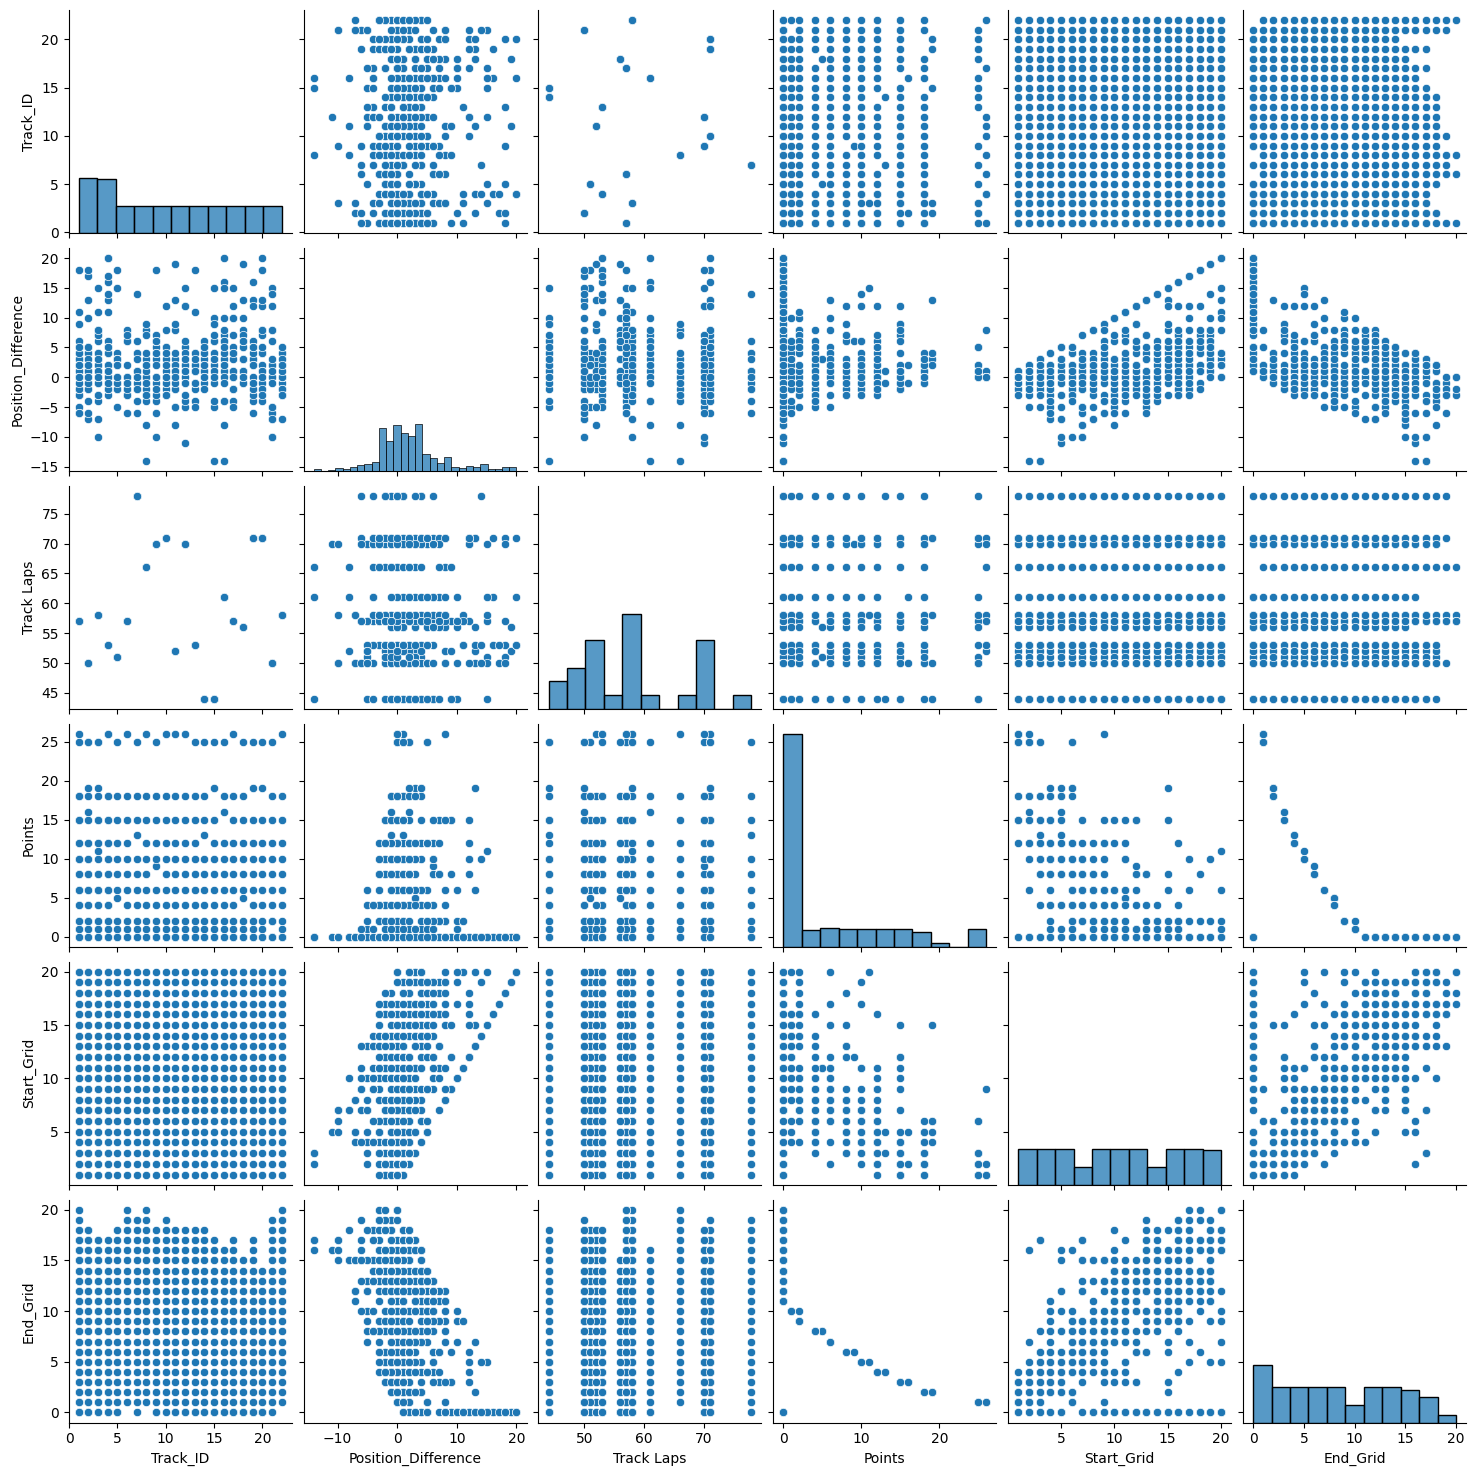

In [10]:
#just pick the more visible correlation interrest
sns.pairplot(df[[ 'Track_ID' ,'Position_Difference','Track Laps','Points','Start_Grid','End_Grid']])

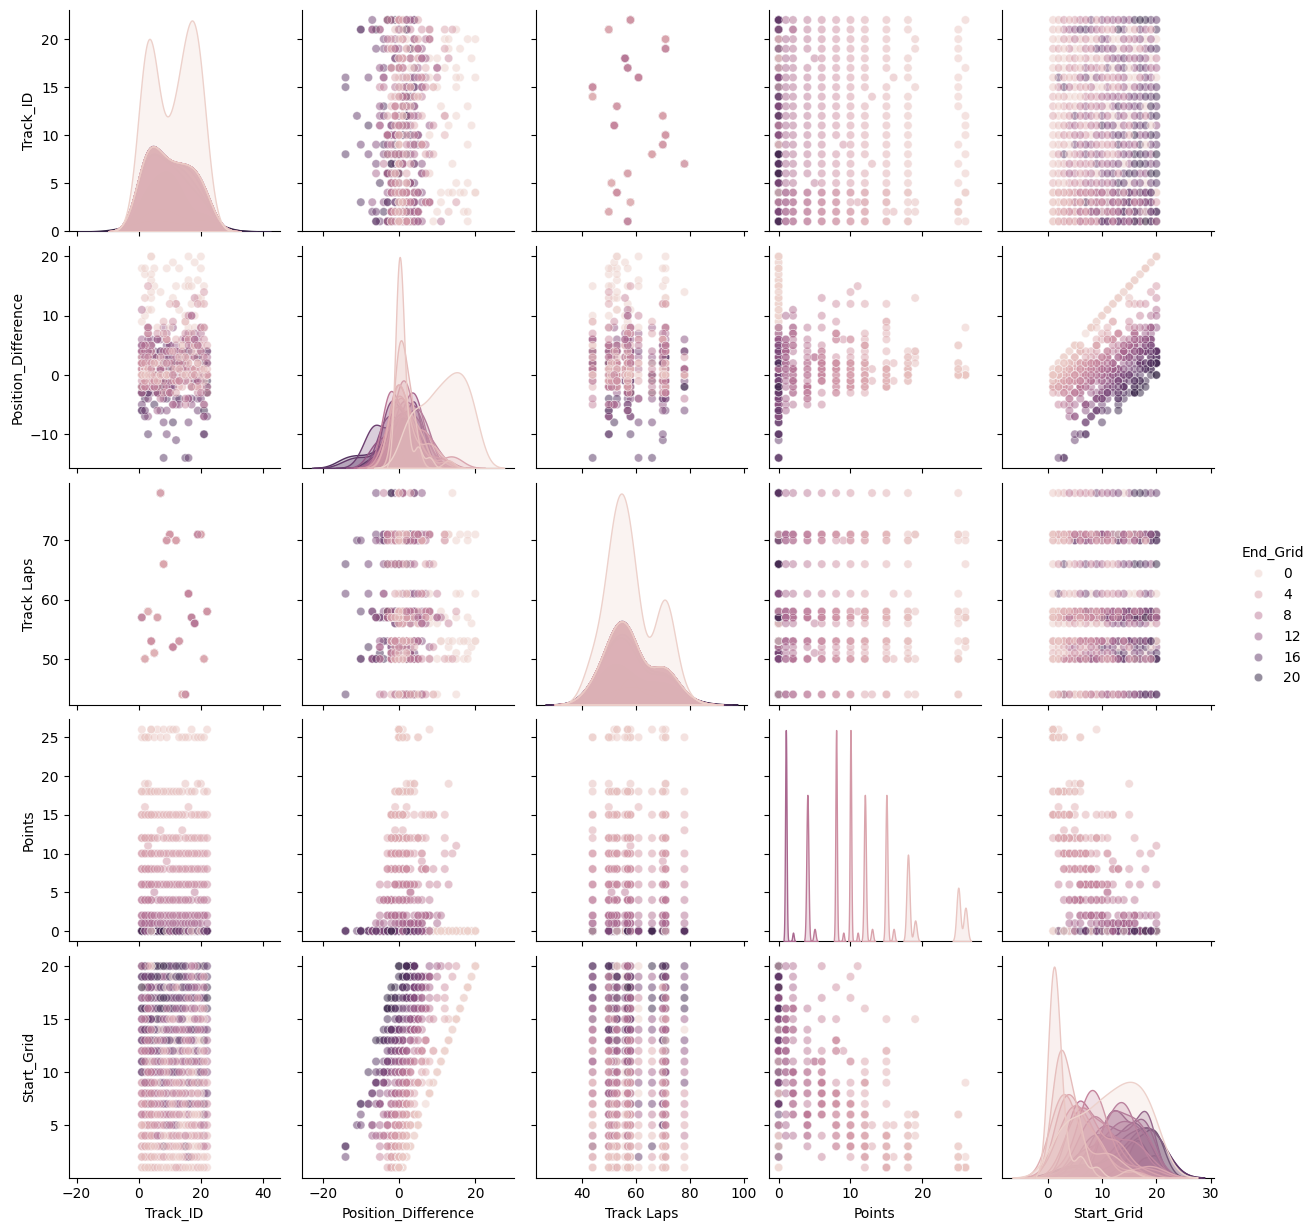

In [11]:

sns.pairplot(df[[ 'Track_ID' ,'Position_Difference','Track Laps','Points','Start_Grid','End_Grid']], hue='End_Grid', plot_kws=dict(alpha=0.5))


In [12]:
df

Track  Track_ID  End_Grid  Start_Grid  Driver_ID  \
0          Bahrain         1        16          13         24   
1     Saudi Arabia         2        13          11         24   
2     Saudi Arabia         2        18          14         77   
3        Australia         3        11          19         77   
4       Azerbaijan         5        18          13         77   
..             ...       ...       ...         ...        ...   
514    Netherlands        15         8           4         23   
515          Italy        13         7           6         23   
516  United States        18         9          15         23   
517  United States        18        10          16          2   
518         Mexico        19         9          14         23   

              Driver                Team  Team_ID  Points  Set_Fastest_Lap  \
0        Guanyu Zhou  Alfa Romeo Ferrari       11       0             True   
1        Guanyu Zhou  Alfa Romeo Ferrari       11       0            False   
2    Valtteri Bottas  Alfa Romeo Ferrari       11       0            False   
3    Valtteri Bottas  Alfa Romeo Ferrari       11       0            False   
4    Valtteri Bottas  Alfa Romeo Ferrari       11       0            False   
..               ...                 ...      ...     ...              ...   
514  Alexander Albon   Williams Mercedes       10       4            False   
515  Alexander Albon   Williams Mercedes       10       6            False   
516  Alexander Albon   Williams Mercedes       10       2            False   
517   Logan Sargeant   Williams Mercedes       10       1            False   
518  Alexander Albon   Williams Mercedes       10       2            False   

     Year_ID  Position_Difference  Track Length  Podium  Track Laps  Height  \
0       2023                   -3           5.4   False          57    1.75   
1       2023                   -2           6.1   False          50    1.75   
2       2023                   -4           6.1   False          50    1.73   
3       2023                    8           5.3   False          58    1.73   
4       2023                   -5           6.0   False          51    1.73   
..       ...                  ...           ...     ...         ...     ...   
514     2023                   -4           4.2   False          44    1.86   
515     2023                   -1           5.7   False          53    1.86   
516     2023                    6           3.4   False          56    1.86   
517     2023                    6           3.4   False          56    1.81   
518     2023                    5           4.3   False          71    1.86   

     Weight Track_Category  
0        63            Dry  
1        63            Dry  
2        69            Dry  
3        69            Dry  
4        69            Dry  
..      ...            ...  
514      74            Wet  
515      74            Dry  
516      74            Wet  
517      71            Wet  
518      74            Dry  

[519 rows x 18 columns]

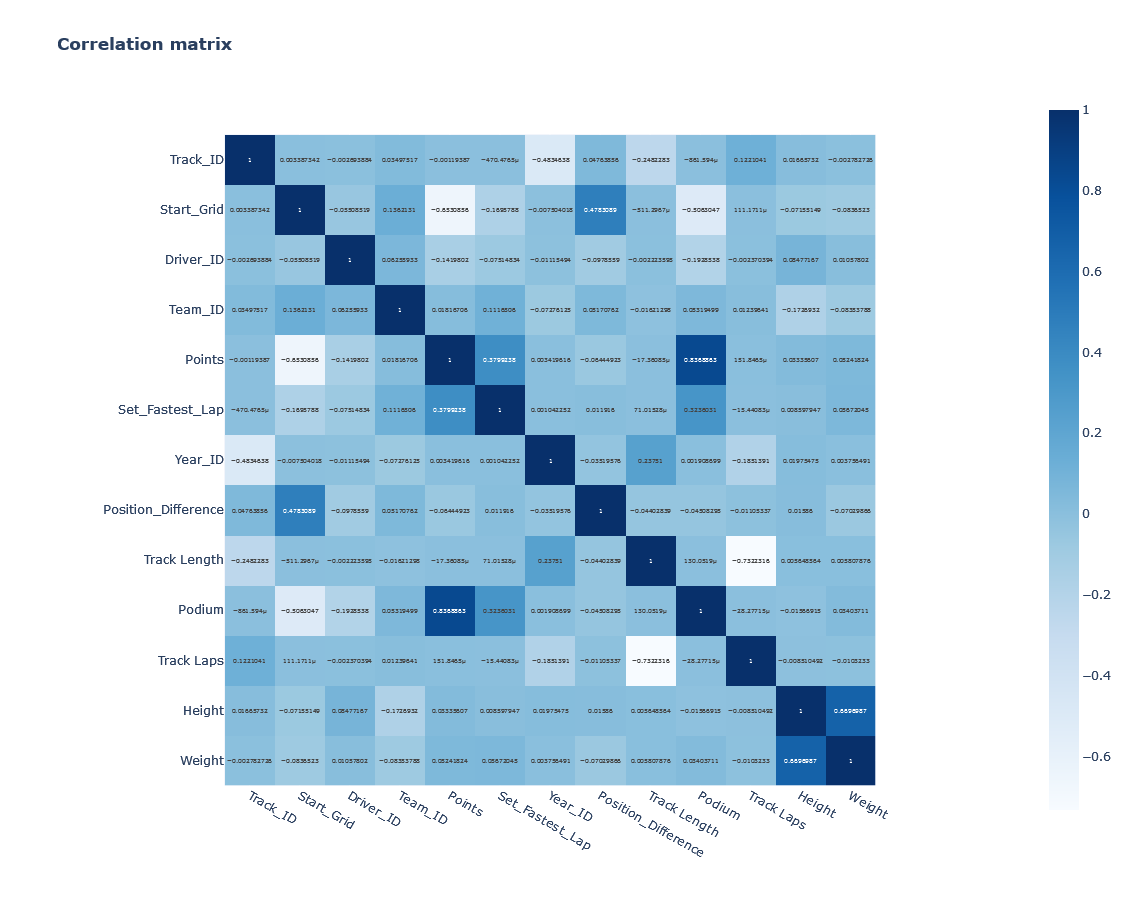

In [13]:

fig=px.imshow(df.drop(columns=['End_Grid','Driver','Team','Track','Track_Category']).corr(),text_auto=True, color_continuous_scale=px.colors.sequential.Blues, width = 900,height = 900,title='<b>Correlation matrix')

fig.show()

In [14]:
fig = px.scatter(df, x="Start_Grid", y="End_Grid", trendline="ols", color_discrete_sequence=['steelbl'],
                 title='<b>End Position dependency StartPosition ', color='End_Grid',height = 800, color_continuous_scale=px.colors.sequential.Blues)
fig.update_layout(title_x=0.5)
fig.show()

### remove outliers in target value

In [15]:
df

Track  Track_ID  End_Grid  Start_Grid  Driver_ID  \
0          Bahrain         1        16          13         24   
1     Saudi Arabia         2        13          11         24   
2     Saudi Arabia         2        18          14         77   
3        Australia         3        11          19         77   
4       Azerbaijan         5        18          13         77   
..             ...       ...       ...         ...        ...   
514    Netherlands        15         8           4         23   
515          Italy        13         7           6         23   
516  United States        18         9          15         23   
517  United States        18        10          16          2   
518         Mexico        19         9          14         23   

              Driver                Team  Team_ID  Points  Set_Fastest_Lap  \
0        Guanyu Zhou  Alfa Romeo Ferrari       11       0             True   
1        Guanyu Zhou  Alfa Romeo Ferrari       11       0            False   
2    Valtteri Bottas  Alfa Romeo Ferrari       11       0            False   
3    Valtteri Bottas  Alfa Romeo Ferrari       11       0            False   
4    Valtteri Bottas  Alfa Romeo Ferrari       11       0            False   
..               ...                 ...      ...     ...              ...   
514  Alexander Albon   Williams Mercedes       10       4            False   
515  Alexander Albon   Williams Mercedes       10       6            False   
516  Alexander Albon   Williams Mercedes       10       2            False   
517   Logan Sargeant   Williams Mercedes       10       1            False   
518  Alexander Albon   Williams Mercedes       10       2            False   

     Year_ID  Position_Difference  Track Length  Podium  Track Laps  Height  \
0       2023                   -3           5.4   False          57    1.75   
1       2023                   -2           6.1   False          50    1.75   
2       2023                   -4           6.1   False          50    1.73   
3       2023                    8           5.3   False          58    1.73   
4       2023                   -5           6.0   False          51    1.73   
..       ...                  ...           ...     ...         ...     ...   
514     2023                   -4           4.2   False          44    1.86   
515     2023                   -1           5.7   False          53    1.86   
516     2023                    6           3.4   False          56    1.86   
517     2023                    6           3.4   False          56    1.81   
518     2023                    5           4.3   False          71    1.86   

     Weight Track_Category  
0        63            Dry  
1        63            Dry  
2        69            Dry  
3        69            Dry  
4        69            Dry  
..      ...            ...  
514      74            Wet  
515      74            Dry  
516      74            Wet  
517      71            Wet  
518      74            Dry  

[519 rows x 18 columns]

In [16]:
q_75 = df['End_Grid'].quantile(q=0.75)  #    
q_25 = df['End_Grid'].quantile(q=0.25)
iqr = q_75 - q_25
upper_bound = q_75 + 1.5 * iqr
df.loc[df['End_Grid'] > upper_bound, 'End_Grid'] = upper_bound

In [17]:
df

Track  Track_ID  End_Grid  Start_Grid  Driver_ID  \
0          Bahrain         1        16          13         24   
1     Saudi Arabia         2        13          11         24   
2     Saudi Arabia         2        18          14         77   
3        Australia         3        11          19         77   
4       Azerbaijan         5        18          13         77   
..             ...       ...       ...         ...        ...   
514    Netherlands        15         8           4         23   
515          Italy        13         7           6         23   
516  United States        18         9          15         23   
517  United States        18        10          16          2   
518         Mexico        19         9          14         23   

              Driver                Team  Team_ID  Points  Set_Fastest_Lap  \
0        Guanyu Zhou  Alfa Romeo Ferrari       11       0             True   
1        Guanyu Zhou  Alfa Romeo Ferrari       11       0            False   
2    Valtteri Bottas  Alfa Romeo Ferrari       11       0            False   
3    Valtteri Bottas  Alfa Romeo Ferrari       11       0            False   
4    Valtteri Bottas  Alfa Romeo Ferrari       11       0            False   
..               ...                 ...      ...     ...              ...   
514  Alexander Albon   Williams Mercedes       10       4            False   
515  Alexander Albon   Williams Mercedes       10       6            False   
516  Alexander Albon   Williams Mercedes       10       2            False   
517   Logan Sargeant   Williams Mercedes       10       1            False   
518  Alexander Albon   Williams Mercedes       10       2            False   

     Year_ID  Position_Difference  Track Length  Podium  Track Laps  Height  \
0       2023                   -3           5.4   False          57    1.75   
1       2023                   -2           6.1   False          50    1.75   
2       2023                   -4           6.1   False          50    1.73   
3       2023                    8           5.3   False          58    1.73   
4       2023                   -5           6.0   False          51    1.73   
..       ...                  ...           ...     ...         ...     ...   
514     2023                   -4           4.2   False          44    1.86   
515     2023                   -1           5.7   False          53    1.86   
516     2023                    6           3.4   False          56    1.86   
517     2023                    6           3.4   False          56    1.81   
518     2023                    5           4.3   False          71    1.86   

     Weight Track_Category  
0        63            Dry  
1        63            Dry  
2        69            Dry  
3        69            Dry  
4        69            Dry  
..      ...            ...  
514      74            Wet  
515      74            Dry  
516      74            Wet  
517      71            Wet  
518      74            Dry  

[519 rows x 18 columns]

In [18]:
df.drop (['Track_ID', 'Driver'], axis=1, inplace=True)

In [19]:
df

Track  End_Grid  Start_Grid  Driver_ID                Team  \
0          Bahrain        16          13         24  Alfa Romeo Ferrari   
1     Saudi Arabia        13          11         24  Alfa Romeo Ferrari   
2     Saudi Arabia        18          14         77  Alfa Romeo Ferrari   
3        Australia        11          19         77  Alfa Romeo Ferrari   
4       Azerbaijan        18          13         77  Alfa Romeo Ferrari   
..             ...       ...         ...        ...                 ...   
514    Netherlands         8           4         23   Williams Mercedes   
515          Italy         7           6         23   Williams Mercedes   
516  United States         9          15         23   Williams Mercedes   
517  United States        10          16          2   Williams Mercedes   
518         Mexico         9          14         23   Williams Mercedes   

     Team_ID  Points  Set_Fastest_Lap  Year_ID  Position_Difference  \
0         11       0             True     2023                   -3   
1         11       0            False     2023                   -2   
2         11       0            False     2023                   -4   
3         11       0            False     2023                    8   
4         11       0            False     2023                   -5   
..       ...     ...              ...      ...                  ...   
514       10       4            False     2023                   -4   
515       10       6            False     2023                   -1   
516       10       2            False     2023                    6   
517       10       1            False     2023                    6   
518       10       2            False     2023                    5   

     Track Length  Podium  Track Laps  Height  Weight Track_Category  
0             5.4   False          57    1.75      63            Dry  
1             6.1   False          50    1.75      63            Dry  
2             6.1   False          50    1.73      69            Dry  
3             5.3   False          58    1.73      69            Dry  
4             6.0   False          51    1.73      69            Dry  
..            ...     ...         ...     ...     ...            ...  
514           4.2   False          44    1.86      74            Wet  
515           5.7   False          53    1.86      74            Dry  
516           3.4   False          56    1.86      74            Wet  
517           3.4   False          56    1.81      71            Wet  
518           4.3   False          71    1.86      74            Dry  

[519 rows x 16 columns]

In [20]:
df= pd.get_dummies(df, columns=['Track','Team', 'Set_Fastest_Lap', 'Podium', 'Track_Category','Year_ID'], drop_first=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   End_Grid                           519 non-null    int64  
 1   Start_Grid                         519 non-null    int64  
 2   Driver_ID                          519 non-null    int64  
 3   Team_ID                            519 non-null    int64  
 4   Points                             519 non-null    int64  
 5   Position_Difference                519 non-null    int64  
 6   Track Length                       519 non-null    float64
 7   Track Laps                         519 non-null    int64  
 8   Height                             519 non-null    float64
 9   Weight                             519 non-null    int64  
 10  Track_Australia                    519 non-null    bool   
 11  Track_Austria                      519 non-null    bool   

### Target and Features Selection

In [22]:
df

End_Grid  Start_Grid  Driver_ID  Team_ID  Points  Position_Difference  \
0          16          13         24       11       0                   -3   
1          13          11         24       11       0                   -2   
2          18          14         77       11       0                   -4   
3          11          19         77       11       0                    8   
4          18          13         77       11       0                   -5   
..        ...         ...        ...      ...     ...                  ...   
514         8           4         23       10       4                   -4   
515         7           6         23       10       6                   -1   
516         9          15         23       10       2                    6   
517        10          16          2       10       1                    6   
518         9          14         23       10       2                    5   

     Track Length  Track Laps  Height  Weight  ...  Team_Kick Sauber Ferrari  \
0             5.4          57    1.75      63  ...                     False   
1             6.1          50    1.75      63  ...                     False   
2             6.1          50    1.73      69  ...                     False   
3             5.3          58    1.73      69  ...                     False   
4             6.0          51    1.73      69  ...                     False   
..            ...         ...     ...     ...  ...                       ...   
514           4.2          44    1.86      74  ...                     False   
515           5.7          53    1.86      74  ...                     False   
516           3.4          56    1.86      74  ...                     False   
517           3.4          56    1.81      71  ...                     False   
518           4.3          71    1.86      74  ...                     False   

     Team_McLaren Mercedes  Team_Mercedes  Team_RB Honda RBPT  \
0                    False          False               False   
1                    False          False               False   
2                    False          False               False   
3                    False          False               False   
4                    False          False               False   
..                     ...            ...                 ...   
514                  False          False               False   
515                  False          False               False   
516                  False          False               False   
517                  False          False               False   
518                  False          False               False   

     Team_Red Bull Racing Honda RBPT  Team_Williams Mercedes  \
0                              False                   False   
1                              False                   False   
2                              False                   False   
3                              False                   False   
4                              False                   False   
..                               ...                     ...   
514                            False                    True   
515                            False                    True   
516                            False                    True   
517                            False                    True   
518                            False                    True   

     Set_Fastest_Lap_True  Podium_True  Track_Category_Wet  Year_ID_2024  
0                    True        False               False         False  
1                   False        False               False         False  
2                   False        False               False         False  
3                   False        False               False         False  
4                   False        False               False         False  
..                    ...          ...                 ...           ...  
514                 False       

##Features Engeneering

In [23]:
#df['Position_Difference_per_Lap'] = df['Position_Difference'] / df['Track_Laps']
df['Position_Difference_per_km'] = df['Position_Difference'] / df['Track Length']


df['BMI'] = df['Weight'] / (df['Height'] ** 2)
df['Height_Weight_Product'] = df['Height'] * df['Weight']
df['Track_Condition_Year'] = df['Track_Category_Wet'].astype(int) * df['Year_ID_2024'].astype(int)
df = df.sort_values(by=['Driver_ID', 'Year_ID_2024'])
df['Previous_Points'] = df.groupby('Driver_ID')['Points'].shift(1)
df['Previous_Position_Difference'] = df.groupby('Driver_ID')['Position_Difference'].shift(1)
df.fillna(0, inplace=True)


In [24]:
df

End_Grid  Start_Grid  Driver_ID  Team_ID  Points  Position_Difference  \
268         2          15          1        9      19                   13   
270         1           9          1        9      26                    8   
271         1           1          1        9      26                    0   
273         1           1          1        9      26                    0   
274         1           1          1        9      26                    0   
..        ...         ...        ...      ...     ...                  ...   
448         6           3         81        6       8                   -3   
299         8           8         81        6       4                    0   
300         4           5         81        6      12                    1   
303         4           5         81        6      12                    1   
305         8           6         81        6       4                   -2   

     Track Length  Track Laps  Height  Weight  ...  Set_Fastest_Lap_True  \
268           6.1          50    1.81      72  ...                  True   
270           5.4          57    1.81      72  ...                  True   
271           4.6          66    1.81      72  ...                  True   
273           4.3          71    1.81      72  ...                  True   
274           5.8          52    1.81      72  ...                  True   
..            ...         ...     ...     ...  ...                   ...   
448           5.5          58    1.78      68  ...                 False   
299           5.4          57    1.78      68  ...                 False   
300           6.1          50    1.78      68  ...                 False   
303           5.3          58    1.78      68  ...                 False   
305           5.8          53    1.78      68  ...                 False   

     Podium_True  Track_Category_Wet  Year_ID_2024  \
268         True               False         False   
270         True               False         False   
271         True               False         False   
273         True                True         False   
274         True                True         False   
..           ...                 ...           ...   
448        False               False         False   
299        False               False          True   
300        False               False          True   
303        False               False          True   
305        False                True          True   

     Position_Difference_per_km        BMI  Height_Weight_Product  \
268                    2.131148  21.977351                 130.32   
270                    1.481481  21.977351                 130.32   
271                    0.000000  21.977351                 130.32   
273                    0.000000  21.977351                 130.32   
274                    0.000000  21.977351                 130.32   
..                          ...        ...                    ...   
448                   -0.545455  21.461937                 121.04   
299                    0.000000  21.461937                 121.04   
300                    0.163934  21.461937                 121.04   
303                    0.188679  21.461937                 121.04   
305                   -0.344828  21.461937                 121.04   

     Track_Condition_Year  Previous_Points  Previous_Position_Difference  
268                     0              0.0                           0.0  
270                     0             19.0                          13.0  
271                     0             26.0                           8.0  
273                     0             26.0                           0.0  
274                     0             26.0                           0.0  
..                    ...              ...                           ...  
448                     0              4.0                          -1.0  
299                     0              8.0                          -3.0  
30

In [25]:
X = df.drop(columns=['End_Grid'])
y = df['End_Grid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling data is crucial when working with linear models.
1) Standardization:  
Standardizing features ensures that they are centered around 0 and have standard deviation of 1.
    
2) Normalization:
    Normalization brings numeric columns to a common scale without distorting value differences.


In [26]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Before we want to see the most important features to fit our model



In [38]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)


r2_test = r2_score(y_test, y_pred_test)
explained_variance_train = explained_variance_score(y_train, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_pred_train))
pearson_corr_train, _ = pearsonr(y_train, y_pred_train)
metrics_dict = {
    "Test R2": [r2_test],
    "Train Explained Variance": [explained_variance_train],
    "Train MAPE": [mape_train],
    "Train MAE": [mae_train],
    "Train MSE": [mse_train],
    "Train RMSE": [rmse_train],
    "Train RMSLE": [rmsle_train],
    "Train Pearson Correlation": [pearson_corr_train]
}

metrics_df = pd.DataFrame(metrics_dict)
metrics_df


Test R2  Train Explained Variance    Train MAPE  Train MAE  Train MSE  \
0  0.947594                  0.993917  2.186688e+14   0.201084   0.202051   

   Train RMSE  Train RMSLE  Train Pearson Correlation  
0    0.449501      0.15589                   0.997165

In [28]:
y_pred_test 


array([ 8.01, 11.64,  1.  ,  7.42, 12.03,  2.  ,  0.12, 15.46,  0.44,
       14.98, 13.13,  3.  , 13.82,  3.99,  1.  , 13.33,  8.1 , 18.88,
        0.54,  1.99,  5.  ,  6.  ,  4.92,  7.04, 15.79,  0.  ,  2.  ,
        3.1 ,  8.07, 16.92, 11.68, 14.24, 13.85,  1.  ,  7.  ,  2.  ,
       11.37,  4.  ,  3.96,  0.  ,  7.  , 16.5 , 14.3 ,  6.  ,  8.  ,
        6.  , 18.17, 12.19,  7.01,  3.99,  6.89, 11.69,  7.02,  5.01,
       12.9 ,  3.01, 18.54,  2.  ,  1.  ,  8.  ,  5.99,  8.  , 10.  ,
        8.  , 17.71, 14.83,  6.85,  9.02,  3.  ,  0.11,  4.  ,  2.  ,
        2.1 ,  1.95, 14.75,  1.47,  3.  ,  5.01, 10.  ,  4.97,  3.01,
       16.18,  1.01, 10.  ,  3.99,  3.08,  8.18, 13.77, 16.99, 15.18,
       14.93,  0.39,  5.87,  2.  , 12.61, 13.81,  4.85,  1.05,  6.  ,
        6.  ,  9.02,  5.  , 16.15, 15.82])

In [29]:
errors = y_train - y_pred_train
error_stats = {
    "Min. (raw)": errors.min(),
    "Min.": np.percentile(errors, 0),
    "25th perc.": np.percentile(errors, 25),
    "Median": np.median(errors),
    "75th perc.": np.percentile(errors, 75),
    "90th perc.": np.percentile(errors, 90),
    "Max.": np.percentile(errors, 100),
    "Max. (raw)": errors.max(),
    "Average": errors.mean(),
    "Standard deviation": errors.std()
}


error_stats_df = pd.DataFrame(error_stats, index=[0])
error_stats_df

Min. (raw)  Min.  25th perc.  Median  75th perc.  90th perc.  Max.  \
0       -2.47 -2.47       -0.05     0.0        0.01        0.27  2.99   

   Max. (raw)   Average  Standard deviation  
0        2.99  0.010265            0.407702

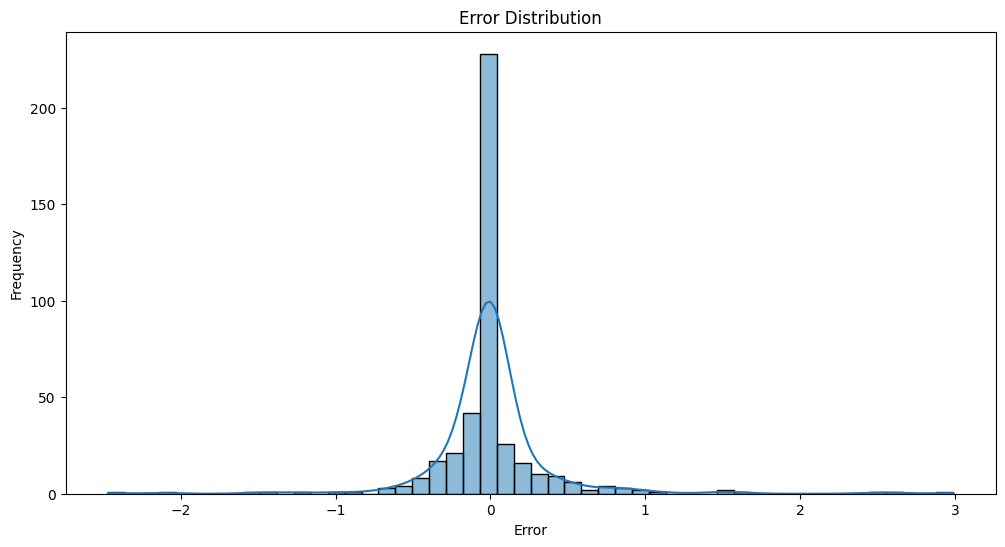

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(errors, bins=50, kde=True)
plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()




In [31]:
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
num_features = len(importance_df)
colors = px.colors.qualitative.Dark24[:num_features]
color_map = {feature: color for feature, color in zip(importance_df['Feature'], colors)}

# Create the bar chart using Plotly Express
fig = px.bar(importance_df, x='Feature', y='Importance',
             labels={'Feature': 'Feature', 'Importance': 'Importance'},
             title='Feature Importance',
             height=800, width=1200,
             color='Feature',
             color_discrete_map=color_map)

fig.show()

In [32]:
errors = y_train - y_pred_train
error_stats = {
    "Min. (raw)": errors.min(),
    "Min.": np.percentile(errors, 0),
    "25th perc.": np.percentile(errors, 25),
    "Median": np.median(errors),
    "75th perc.": np.percentile(errors, 75),
    "90th perc.": np.percentile(errors, 90),
    "Max.": np.percentile(errors, 100),
    "Max. (raw)": errors.max(),
    "Average": errors.mean(),
    "Standard deviation": errors.std()
}


error_stats_df = pd.DataFrame(error_stats, index=[0])
error_stats_df







Min. (raw)  Min.  25th perc.  Median  75th perc.  90th perc.  Max.  \
0       -2.47 -2.47       -0.05     0.0        0.01        0.27  2.99   

   Max. (raw)   Average  Standard deviation  
0        2.99  0.010265            0.407702

In [33]:
fig_test = px.scatter(x=y_test, y=y_pred_test, labels={'x': 'True Values', 'y': 'Predicted Values'}, width=1200, height=700, title='Test Data: Scatter Plot of True vs Predicted Values')
fig_test.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', name='Ideal fit', line=dict(color='red', dash='dash')))
fig_test.show()


In [34]:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validated predictions
y_pred_train_cv = cross_val_predict(rf, X_train_scaled, y_train, cv=cv)
y_pred_test_cv = cross_val_predict(rf, X_test_scaled, y_test, cv=cv)


In [35]:

r2_test = r2_score(y_test, y_pred_test_cv)
explained_variance_train = explained_variance_score(y_train, y_pred_train_cv)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train_cv)
mae_train = mean_absolute_error(y_train, y_pred_train_cv)
mse_train = mean_squared_error(y_train, y_pred_train_cv)
rmse_train = np.sqrt(mse_train)
rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_pred_train_cv))
pearson_corr_train, _ = pearsonr(y_train, y_pred_train_cv)
metrics_dict = {
    "Test R2": [r2_test],
    "Train Explained Variance": [explained_variance_train],
    "Train MAPE": [mape_train],
    "Train MAE": [mae_train],
    "Train MSE": [mse_train],
    "Train RMSE": [rmse_train],
    "Train RMSLE": [rmsle_train],
    "Train Pearson Correlation": [pearson_corr_train]
}

metrics_df = pd.DataFrame(metrics_dict)
metrics_df

Test R2  Train Explained Variance    Train MAPE  Train MAE  Train MSE  \
0  0.832095                  0.958633  6.124895e+14   0.576916    1.37465   

   Train RMSE  Train RMSLE  Train Pearson Correlation  
0    1.172455     0.301348                   0.979893

In [36]:
errors = y_train - y_pred_train_cv
error_stats = {
    "Min. (raw)": errors.min(),
    "Min.": np.percentile(errors, 0),
    "25th perc.": np.percentile(errors, 25),
    "Median": np.median(errors),
    "75th perc.": np.percentile(errors, 75),
    "90th perc.": np.percentile(errors, 90),
    "Max.": np.percentile(errors, 100),
    "Max. (raw)": errors.max(),
    "Average": errors.mean(),
    "Standard deviation": errors.std()
}


error_stats_df = pd.DataFrame(error_stats, index=[0])
error_stats_df

Min. (raw)  Min.  25th perc.  Median  75th perc.  90th perc.  Max.  \
0       -5.23 -5.23       -0.16     0.0       0.095       0.898  7.67   

   Max. (raw)   Average  Standard deviation  
0        7.67  0.035181            1.173341

In [37]:
# Create the scatter plot for the cross-validated test data
fig_test = px.scatter(x=y_test, y=y_pred_test_cv, labels={'x': 'True Values', 'y': 'Predicted Values'}, width=1200, height=700, title='Cross-Validated Test Data: Scatter Plot of True vs Predicted Values')
fig_test.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', name='Ideal fit', line=dict(color='red', dash='dash')))
fig_test.show()
